In [1]:
%cd /content/drive/MyDrive/Colab Notebooks/esgc

/content/drive/MyDrive/Colab Notebooks/esgc


In [2]:
!pwd

/content/drive/MyDrive/Colab Notebooks/esgc


### Object Detection(객체 탐지)
1. 분류(Classification) : 물체가 어떤 물체인지 클래스를 구분하는 문제
2. Localization : 물체가 어디에 있는지 바운딩 박스로 위치 정보를 나타내는 문제
3. Object Detection : Classification + Localization을 동시에 진행하는 것

### YOLO(You Only Look Once)
https://docs.ultralytics.com/ko/#where-to-start

| 연도         | 버전       | 주요 개선 사항 및 특징                                                                                                                                                                                                      |
|--------------|------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 2016         | YOLO (v1)  | - 워싱턴 대학교 조셉 레드몬, 알리 파르하디가 개발<br>- 단일 단계(single-stage) 객체 탐지 기법 도입<br>- 이미지를 S×S 격자로 나누어 위치+클래스를 동시에 예측<br>- 7×7 그리드, 각 셀에서 2개의 바운딩 박스와 클래스 확률 출력 |
| 2017         | YOLOv2     | - “YOLO9000: Better, Faster, Stronger” 논문<br>- 앵커 박스 개념 도입(Faster R-CNN에서 차용)<br>- 차원 클러스터링(Anchor Box 크기 최적화)<br>- 다중 스케일(multiscale) 학습과 일괄 정규화(BN) 적용                                 |
| 2018         | YOLOv3     | - Darknet-53 백본 사용(잔차 블록+스킵 커넥션 구조)<br>- 3단계(3-scale) 예측으로 작은 물체 인식 성능 개선<br>- 시그모이드 함수를 통한 바운딩 박스 좌표 예측<br>- 공간 피라미드 풀링(SPP) 아이디어 일부 반영                          |
| 2020년 4월   | YOLOv4     | - CSPDarknet53 백본 도입 및 Mosaic 데이터 증강<br>- BoF(Freebies), BoS(Specials) 기법 등 다양한 최적화 기법 집약<br>- SPP 추가, Weighted-Residual-Connection(WRC) 적용<br>- 빠른 추론 속도와 높은 정확도 달성                |
| 2020년 6월   | YOLOv5     | - Ultralytics에서 PyTorch 기반으로 개발<br>- 자동 앵커(Auto Anchor), 모자이크 증강 등 다양한 편의 기능<br>- 하이퍼파라미터 최적화 및 통합 실험 추적 제공<br>- 모델 크기가 작아지고, v4 대비 약 10% 이상 성능 향상                     |
| 2022년 7월   | YOLOv7     | - 기존 YOLO 계열 대비 학습 과정 최적화 및 연산량 감소<br>- E-ELAN(Extended ELAN) 구조를 활용하여 성능 강화<br>- trainable bag of freebies 등 학습 전략 다수 제안<br>- 실시간 객체 탐지 분야에서 높은 정확도 및 속도 제공         |
| 2022년 9월   | YOLOv6     | - Meituan(메이투안)에서 개발<br>- 앵커 기반 + 앵커 프리 방식 모두 지원<br>- Quantization, Knowledge Distillation 기법 도입<br>- 효율적 구조 재설계를 통해 속도·정확도 동시 개선                                           |
| 2023년 1월   | YOLOv8     | - Ultralytics에서 새롭게 공개한 통합 프레임워크<br>- 앵커 프리(Anchor-free) 기법 및 디커플 헤드(Decoupled Head) 적용<br>- 객체 감지, 인스턴스 세분화 등 다양한 시각지능 모델링에 사용<br>- 이전 버전 대비 가볍고 정확도 개선         |
| 2024년 2월   | YOLOv9     | - 기존 네트워크에서 정보 손실 문제를 해결하기 위해 PGI(Preserved Gradient Integration) 적용<br>- GELAN(Generalized ELAN) 신경망 구조로 업그레이드<br>- 연산 효율과 정확도를 동시에 향상                                           |
| 2024년 5월   | YOLOv10    | - 칭화대 연구진이 Ultralytics Python 패키지를 활용해 개발<br>- 비최대 억제(NMS) 제거한 엔드투엔드 감지 헤드 도입<br>- 고난도 환경에서의 물체 분할 및 인식 정확도 개선                                                               |
| 2024년 9월   | YOLOv11    | - 물체 감지, 세분화, 포즈 추정, 추적, 분류 등 다양한 작업에서 최첨단(SOTA) 성능 제공<br>- Ultralytics YOLO 계열의 최신 버전<br>- 확장된 멀티태스킹 능력으로 산업·연구 분야에서 활용도 증대                                              |

- **주요 개선사항 요약**  
  - **YOLO ~ YOLOv3**: 격자 기반 단일 단계 예측 구조를 유지하면서 앵커 박스, 멀티 스케일 예측 등 주요 기능 추가  
  - **YOLOv4 ~ YOLOv7**: 백본 네트워크 개선(CSPDarknet53, E-ELAN 등), 다양한 데이터 증강(Mosaic 등) 및 학습 최적화 기법 도입  
  - **YOLOv8 ~**: 앵커 프리, 디커플 헤드, 엔드투엔드 감지 헤드 등 새로운 접근으로 정확도·속도 동시 향상  

> - `Latency T4 TensorRT10 FP16` : Nvidia T4 GPU에서 TensorRT 10 최적화와 FP16 연산 방식을 사용하여, 모델이 얼마나 빠르게 예측을 수행하는지를 측정한 값
> - `COCO mAP` : COCO 데이터셋을 기준으로, 모델이 객체를 얼마나 정확하게 감지하는지를 평가하는 대표적인 성능 지표

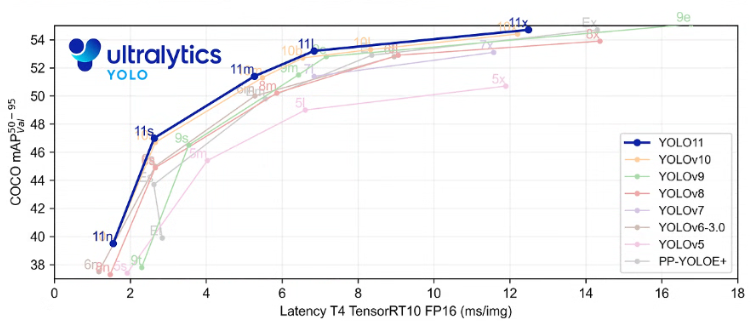

### 학습목표
- 음식 사진을 보고 종류를 분류하는 모델을 만들어보자

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

### kaggle 에디터에서 필요한 데이터 다운받는 방법 예시
```python
%cd /kaggle/input/food41/images

!zip -r /kaggle/working/food.zip apple_pie donuts hamburger onion_rings pizza
# !zip : zip파일 만드는 명령어
# -r : 하위 폴더, 파일들을 포함해서 압축하겠다는 옵션
```

In [ ]:
!unzip ./data/food.zip -d ./data/food/

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: ./data/food/apple_pie/1461580.jpg  
  inflating: ./data/food/apple_pie/2766725.jpg  
  inflating: ./data/food/apple_pie/222074.jpg  
  inflating: ./data/food/apple_pie/960233.jpg  
  inflating: ./data/food/apple_pie/2439188.jpg  
  inflating: ./data/food/apple_pie/1159801.jpg  
  inflating: ./data/food/apple_pie/2781167.jpg  
  inflating: ./data/food/apple_pie/3335126.jpg  
  inflating: ./data/food/apple_pie/3421349.jpg  
  inflating: ./data/food/apple_pie/1077964.jpg  
  inflating: ./data/food/apple_pie/3748095.jpg  
  inflating: ./data/food/apple_pie/1305678.jpg  
  inflating: ./data/food/apple_pie/1725573.jpg  
  inflating: ./data/food/apple_pie/2704442.jpg  
  inflating: ./data/food/apple_pie/3270291.jpg  
  inflating: ./data/food/apple_pie/532423.jpg  
  inflating: ./data/food/apple_pie/2511157.jpg  
  inflating: ./data/food/apple_pie/507349.jpg  
  inflating: ./data/food/apple_pie/1322211.jpg  
  inflating: ./data/food/apple_pie/21

### YOLO 폴더 구조 준비
- YOLO 모델은 각 task(작업단위)별로 요구하는 폴더구조가 상이하다
- 폴더 구조 가이드라인에 맞추어 구성해야 학습이 가능!

In [ ]:
import os # 디렉토리 or 파일 등 os 관련된 명령어를 수행하는 도구

In [ ]:
# 각 이미지 파일명을 변수로 할당
apple_pie_filenames = os.listdir("./data/food/apple_pie")
donuts_filenames = os.listdir("./data/food/donuts")
hamburger_filenames = os.listdir("./data/food/hamburger")
onion_rings_filenames = os.listdir("./data/food/onion_rings")
pizza_filenames = os.listdir("./data/food/pizza")

In [ ]:
len(apple_pie_filenames),len(donuts_filenames),len(hamburger_filenames),len(onion_rings_filenames),len(pizza_filenames)

(1000, 1000, 1000, 1000, 1000)

In [ ]:
# 폴더 생성
if not os.path.exists("./data/food_for_yolo") : # 폴더의 존재 여부 확인하는 함수
    os.mkdir("./data/food_for_yolo") # 없으면, 폴더 생성

# train, test, val 폴더 생성
if not os.path.exists("./data/food_for_yolo/train") :
    os.mkdir("./data/food_for_yolo/train")

if not os.path.exists("./data/food_for_yolo/test") :
    os.mkdir("./data/food_for_yolo/test")

if not os.path.exists("./data/food_for_yolo/val") :
    os.mkdir("./data/food_for_yolo/val")


In [ ]:
# 하위 폴더 생성하기
food_list = ["apple_pie", "donuts", "hamburger", "onion_rings", "pizza"]
folder_list = ["./data/food_for_yolo/train", "./data/food_for_yolo/test", "./data/food_for_yolo/val"]

for folder_path in folder_list :
    for food in food_list :
        if not os.path.exists(folder_path + "/" + food) :
            os.mkdir(folder_path + "/" + food)

- 훈련용 : 640장
- 검증용 : 200장
- 평가용 : 160장

In [ ]:
import shutil # 파일 모음에 대한 고수준 연산을 제공

In [ ]:
for img_name in apple_pie_filenames :
    shutil.move(
        "./data/food_for_yolo/train/apple_pie/" + img_name,
        "./data/food/apple_pie/" + img_name
    )
    shutil.move(
        "./data/food_for_yolo/test/apple_pie/" + img_name,
        "./data/food/apple_pie/" + img_name
    )
    shutil.move(
        "./data/food_for_yolo/val/apple_pie/" + img_name,
        "./data/food/apple_pie/" + img_name
    )

In [ ]:
# train set - apple_pie 사진 이동
for img_name in apple_pie_filenames[:640] :
    # shutil.move(src(이미지 파일 경로), dst(옮겨질 파일 경로))
    shutil.move("./data/food/apple_pie/" + img_name, "./data/food_for_yolo/train/apple_pie/" + img_name)

In [ ]:
# val set - apple_pie 사진 이동
for img_name in apple_pie_filenames[640 : 801] :
    # shutil.move(src(이미지 파일 경로), dst(옮겨질 파일 경로))
    shutil.move("./data/food/apple_pie/" + img_name, "./data/food_for_yolo/val/apple_pie/" + img_name)

In [ ]:
# test set - apple_pie 사진 이동
for img_name in apple_pie_filenames[801:] :
    # shutil.move(src(이미지 파일 경로), dst(옮겨질 파일 경로))
    shutil.move("./data/food/apple_pie/" + img_name, "./data/food_for_yolo/test/apple_pie/" + img_name)

In [ ]:
from tqdm.auto import tqdm # 반복문 진행 현황 출력도구

In [ ]:
# 나머지 클래스들의 이미지들도 옮기기

food_filenames = [donuts_filenames, hamburger_filenames, onion_rings_filenames, pizza_filenames]

for food, img_list in tqdm(zip(food_list[1:], food_filenames)) :
    # train set -  사진 이동
    for img_name in img_list[:640] :
        shutil.move("./data/food/" + food + "/" + img_name, "./data/food_for_yolo/train/" + food + "/" + img_name)

    # val set -  사진 이동
    for img_name in img_list[640 : 801] :
        shutil.move("./data/food/" + food + "/" + img_name, "./data/food_for_yolo/val/" + food + "/" + img_name)

    # test set -  사진 이동
    for img_name in img_list[801:] :
        shutil.move("./data/food/" + food + "/" + img_name, "./data/food_for_yolo/test/" + food + "/" + img_name)

0it [00:00, ?it/s]

In [ ]:
# 각 이미지 파일명을 변수로 할당
apple_pie_filenames = os.listdir("./data/food/apple_pie")
donuts_filenames = os.listdir("./data/food/donuts")
hamburger_filenames = os.listdir("./data/food/hamburger")
onion_rings_filenames = os.listdir("./data/food/onion_rings")
pizza_filenames = os.listdir("./data/food/pizza")

In [ ]:
len(apple_pie_filenames),len(donuts_filenames),len(hamburger_filenames),len(onion_rings_filenames),len(pizza_filenames)

(0, 0, 0, 0, 0)

## YOLOv11 학습하기

https://docs.ultralytics.com/ko/usage/cfg/#modes

In [3]:
!pip -q install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.0 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO # 울트라리틱스에서 제공하고 있는 모델, 또는 학습이 완료된 모델 등을 다룰 수 있는 도구

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# 미리 학습되어 있는 모델 가중치 파일을 이용해서 YOLO cls 모델 생성
model = YOLO("./data/yolo11n-cls.pt")

100%|██████████| 5.52M/5.52M [00:00<00:00, 98.2MB/s]


In [ ]:
# 학습
results = model.train(data = "./data/food_for_yolo/", epochs = 20, imgsz = 224)

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./data/food_for_yolo/, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=./data/yolo11n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretra

100%|██████████| 5.35M/5.35M [00:00<00:00, 94.9MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.1 ms, read: 10.2±4.6 MB/s, size: 43.1 KB)


train: Scanning /content/drive/MyDrive/Colab Notebooks/esgc/data/food_for_yolo/train... 3200 images, 0 corrupt: 100%|██████████| 3200/3200 [00:17<00:00, 178.07it/s]


train: New cache created: /content/drive/MyDrive/Colab Notebooks/esgc/data/food_for_yolo/train.cache
val: Fast image access ✅ (ping: 88.5±195.3 ms, read: 2.5±2.5 MB/s, size: 58.0 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/esgc/data/food_for_yolo/val... 843 images, 0 corrupt: 100%|██████████| 843/843 [00:05<00:00, 157.85it/s]


val: New cache created: /content/drive/MyDrive/Colab Notebooks/esgc/data/food_for_yolo/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/20     0.275G      1.651         16        224:   2%|▎         | 5/200 [00:01<00:47,  4.08it/s]

       1/20     0.275G      1.681         16        224:   4%|▍         | 8/200 [00:02<00:42,  4.47it/s]
100%|██████████| 755k/755k [00:00<00:00, 18.9MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 27/27 [00:07<00:00,  3.57it/s]


                   all      0.871          1

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 27/27 [00:06<00:00,  4.29it/s]

                   all      0.866          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 27/27 [00:06<00:00,  4.10it/s]

                   all       0.89          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 27/27 [00:07<00:00,  3.79it/s]

                   all      0.846          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 27/27 [00:06<00:00,  4.28it/s]

                   all      0.856          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]

                   all      0.904          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 27/27 [00:05<00:00,  4.57it/s]

                   all      0.896          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 27/27 [00:07<00:00,  3.66it/s]

                   all      0.892          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 27/27 [00:06<00:00,  4.46it/s]

                   all      0.906          1



      Epoch    GPU_mem       loss  Instances       Size


      10/20     0.357G      0.274         16        224: 100%|██████████| 200/200 [00:41<00:00,  4.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 27/27 [00:07<00:00,  3.72it/s]

                   all       0.91          1



      Epoch    GPU_mem       loss  Instances       Size


      11/20     0.365G     0.2478         16        224: 100%|██████████| 200/200 [00:41<00:00,  4.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 27/27 [00:05<00:00,  4.55it/s]

                   all      0.924          1



      Epoch    GPU_mem       loss  Instances       Size


      12/20     0.375G     0.2193         16        224: 100%|██████████| 200/200 [00:41<00:00,  4.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 27/27 [00:07<00:00,  3.60it/s]

                   all      0.925          1



      Epoch    GPU_mem       loss  Instances       Size


      13/20     0.383G     0.2174         16        224: 100%|██████████| 200/200 [00:41<00:00,  4.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 27/27 [00:05<00:00,  4.58it/s]

                   all      0.925          1



      Epoch    GPU_mem       loss  Instances       Size


      14/20     0.393G       0.19         16        224: 100%|██████████| 200/200 [00:41<00:00,  4.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 27/27 [00:07<00:00,  3.77it/s]

                   all      0.935          1



      Epoch    GPU_mem       loss  Instances       Size


      15/20       0.4G     0.1653         16        224: 100%|██████████| 200/200 [00:40<00:00,  4.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 27/27 [00:06<00:00,  4.16it/s]

                   all      0.935          1



      Epoch    GPU_mem       loss  Instances       Size


      16/20      0.41G     0.1254         16        224: 100%|██████████| 200/200 [00:41<00:00,  4.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 27/27 [00:06<00:00,  4.46it/s]

                   all      0.931          1



      Epoch    GPU_mem       loss  Instances       Size


      17/20     0.418G     0.1305         16        224: 100%|██████████| 200/200 [00:41<00:00,  4.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]

                   all      0.932          1



      Epoch    GPU_mem       loss  Instances       Size


      18/20     0.428G     0.1105         16        224: 100%|██████████| 200/200 [00:41<00:00,  4.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 27/27 [00:06<00:00,  4.42it/s]

                   all      0.938          1



      Epoch    GPU_mem       loss  Instances       Size


      19/20     0.436G     0.1098         16        224: 100%|██████████| 200/200 [00:41<00:00,  4.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 27/27 [00:07<00:00,  3.58it/s]

                   all      0.942          1



      Epoch    GPU_mem       loss  Instances       Size


      20/20     0.443G    0.09104         16        224: 100%|██████████| 200/200 [00:41<00:00,  4.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 27/27 [00:05<00:00,  4.71it/s]

                   all      0.936          1



20 epochs completed in 0.270 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.2MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.2MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-cls summary (fused): 47 layers, 1,532,429 parameters, 0 gradients, 3.2 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/esgc/data/food_for_yolo/train... found 3200 images in 5 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/esgc/data/food_for_yolo/val... found 843 images in 5 classes ✅ 
test: /content/drive/MyDrive/Colab Notebooks/esgc/data/food_for_yolo/test... found 957 images in 5 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all      0.942          1
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


| 출력 항목                                | 설명 |
|-----------------------------------------|------|
| **라이브러리 및 환경 정보**              | `Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)`<br>- Ultralytics, Python, PyTorch, CUDA 버전 및 사용 GPU(메모리 포함) 정보를 표시 |
| **Trainer 설정 요약**                    | `engine/trainer: task=classify, mode=train, model=./data/yolo11n-cls.pt, data=./data/food_for_yolo/, epochs=20, batch=16, imgsz=224, ... save_dir=runs/classify/train`<br>- 학습 작업(task), 실행 모드(mode), 모델 경로, 데이터셋 경로, 에포크 수, 배치 크기, 이미지 크기 등 주요 하이퍼파라미터 및 설정들을 나열 |
| **데이터셋 스캔 결과 (train/val/test)**    | 예: `train: ... found 3200 images in 5 classes`<br>- 학습(train), 검증(val), 테스트(test) 데이터셋의 파일 경로, 이미지 수, 클래스 수를 확인 |
| **클래스 수 변경**                        | `Overriding model.yaml nc=80 with nc=5`<br>- 원래 모델 설정의 클래스 수 80을 데이터셋에 맞춰 5로 변경 |
| **모델 구성 레이어 테이블**                | 테이블 형태로 각 레이어의 정보를 보여줌 (예: `from`, `n`, `params`, `module`, `arguments`)<br>- 각 레이어가 어떤 모듈로 구성되었는지, 파라미터 수와 인자 값들을 상세히 확인 |
| **모델 요약**                             | `YOLO11n-cls summary: 86 layers, 1,537,509 parameters, 1,537,509 gradients, 3.3 GFLOPs`<br>- 전체 레이어 수, 총 파라미터 및 그래디언트 수, 연산량(GFLOPs)을 요약 |
| **Pretrained 가중치 전이**                 | `Transferred 234/236 items from pretrained weights`<br>- 미리 학습된 가중치에서 몇 개 항목이 성공적으로 전이되었는지를 표시 |
| **TensorBoard 설정 안내**                  | `TensorBoard: Start with 'tensorboard --logdir runs/classify/train'...`<br>- TensorBoard를 통해 학습 과정을 시각화하는 방법을 안내 |
| **AMP 체크 및 파일 다운로드**              | 예: `AMP: running Automatic Mixed Precision (AMP) checks...`,<br>`Downloading ... yolo11n.pt to 'yolo11n.pt'...`,<br>`AMP: checks passed ✅`<br>- 자동 혼합 정밀도(AMP) 체크 실행 및 필요한 파일 다운로드 진행 상황과 체크 성공 여부를 표시 |
| **데이터셋 캐시 생성**                     | 예: `train: New cache created: ...train.cache`,<br>`val: New cache created: ...val.cache`<br>- 학습 및 검증 데이터셋을 스캔한 후 캐시 파일을 생성하여 데이터 로딩 속도를 개선 |
| **Optimizer 설정**                        | 예: `optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937'...`,<br>`optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups...`<br>- 옵티마이저 자동 선택 결과와 관련 하이퍼파라미터(learning rate, momentum, weight decay 등)를 출력 |
| **학습 설정 및 시작 안내**                 | `Image sizes 224 train, 224 val`,<br>`Using 2 dataloader workers`,<br>`Logging results to runs/classify/train`,<br>`Starting training for 20 epochs...`<br>- 학습 및 검증 이미지 크기, 데이터 로더 작업자 수, 결과 로그 저장 경로, 총 에포크 수 등 학습 환경을 요약 |
| **Training 진행 상황 출력**               | 예: `Epoch    GPU_mem       loss  Instances       Size` 및 진행률 바<br>- 현재 에포크, GPU 메모리 사용량, 손실 값, 배치 내 이미지(인스턴스) 수, 이미지 크기 등 실시간 학습 진행 상황을 업데이트 |

In [5]:
# 학습되어있는 모델 로드
loaded_model = YOLO("./runs/classify/train/weights/best.pt")

In [6]:
# 예측
results = loaded_model("./data/food_for_yolo/test/apple_pie/1011328.jpg")


image 1/1 /content/drive/MyDrive/Colab Notebooks/esgc/data/food_for_yolo/test/apple_pie/1011328.jpg: 224x224 hamburger 0.64, apple_pie 0.34, donuts 0.01, onion_rings 0.00, pizza 0.00, 164.5ms
Speed: 30.2ms preprocess, 164.5ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


In [7]:
# 여러개 예측 가능
results = loaded_model("./data/food_for_yolo/test/apple_pie")


image 1/161 /content/drive/MyDrive/Colab Notebooks/esgc/data/food_for_yolo/test/apple_pie/1011328.jpg: 224x224 hamburger 0.64, apple_pie 0.34, donuts 0.01, onion_rings 0.00, pizza 0.00, 28.3ms
image 2/161 /content/drive/MyDrive/Colab Notebooks/esgc/data/food_for_yolo/test/apple_pie/1028787.jpg: 224x224 apple_pie 0.90, hamburger 0.06, donuts 0.03, onion_rings 0.00, pizza 0.00, 82.1ms
image 3/161 /content/drive/MyDrive/Colab Notebooks/esgc/data/food_for_yolo/test/apple_pie/1034399.jpg: 224x224 apple_pie 1.00, hamburger 0.00, pizza 0.00, donuts 0.00, onion_rings 0.00, 24.9ms
image 4/161 /content/drive/MyDrive/Colab Notebooks/esgc/data/food_for_yolo/test/apple_pie/1038694.jpg: 224x224 apple_pie 1.00, hamburger 0.00, donuts 0.00, onion_rings 0.00, pizza 0.00, 26.0ms
image 5/161 /content/drive/MyDrive/Colab Notebooks/esgc/data/food_for_yolo/test/apple_pie/1057749.jpg: 224x224 apple_pie 1.00, donuts 0.00, hamburger 0.00, pizza 0.00, onion_rings 0.00, 26.6ms
image 6/161 /content/drive/MyDrive

In [8]:
results[0]

ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'apple_pie', 1: 'donuts', 2: 'hamburger', 3: 'onion_rings', 4: 'pizza'}
obb: None
orig_img: array([[[196, 122, 104],
        [181, 109,  91],
        [169,  97,  80],
        ...,
        [252, 213, 204],
        [252, 213, 205],
        [251, 212, 204]],

       [[201, 127, 109],
        [189, 117,  99],
        [180, 108,  91],
        ...,
        [252, 213, 204],
        [252, 213, 205],
        [252, 213, 205]],

       [[207, 134, 114],
        [198, 127, 107],
        [191, 119, 101],
        ...,
        [255, 214, 205],
        [254, 213, 204],
        [254, 213, 204]],

       ...,

       [[233, 167, 149],
        [233, 167, 149],
        [234, 168, 150],
        ...,
        [253, 227, 220],
        [254, 228, 221],
        [255, 229, 222]],

       [[236, 170, 152],
        [235, 169, 151],
        [235, 169, 151],
        ...,
        [254, 226, 219],
        [25